In [1]:
import os
import glob
import numpy as np
import pandas as pd
from imageio import imread
from features import basic_statistical_features, glcm_features
from features import cross_channel_distance_features, cross_channel_boolean_distance_features
from skimage.color import rgb2gray

In [2]:
data_dir = "data/PCR/"
classes = {"Parasitized":1, "Uninfected":0}

In [3]:
df_features = pd.DataFrame()
Y = []

In [4]:
for cl in classes:
    files = glob.glob(os.path.join(data_dir, cl, "*"))
    for f in files:
        image = imread(f)
        image = image[:,:,0:2]
        featuers = dict()
        featuers.update(basic_statistical_features(image))
        featuers.update(glcm_features(image)) 
        featuers.update(cross_channel_distance_features(image))
        featuers.update(cross_channel_boolean_distance_features(image))
        df_features = df_features.append(featuers, ignore_index=True)
        Y.append(classes[cl])

In [5]:
df_features

,ASM_Ch1,ASM_Ch2,braycurtis_distance_Ch1_Ch2,canberra_distance_Ch1_Ch2,chebyshev_distance_Ch1_Ch2,cityblock_distance_Ch1_Ch2,contrast_Ch1,contrast_Ch2,correlation_Ch1,correlation_Ch2,...,skew_intensity_Ch1,skew_intensity_Ch2,sokalmichener_distance_Ch1_Ch2,sokalsneath_distance_Ch1_Ch2,sqeuclidean_distance_Ch1_Ch2,std_intensity_Ch1,std_intensity_Ch2,total_intensity_Ch1,total_intensity_Ch2,yule_distance_Ch1_Ch2
0,0.087074,0.109931,0.724727,9826.328297,255.0,1402120.0,368.701156,253.739139,0.982443,0.918163,...,-0.287513,4.396465,0.048013,0.099310,138084024.0,65.914355,38.657283,1309945.0,262129.0,0.000025
1,0.070242,0.123172,0.801281,10923.453565,255.0,1270504.0,343.621507,170.466273,0.981989,0.880440,...,-0.176513,6.769393,0.137017,0.228674,143012252.0,66.969991,26.199823,1266217.0,159041.0,0.002205
2,0.087696,0.306655,0.761672,12870.155915,255.0,2122469.0,89.710620,472.474466,0.547730,0.825312,...,1.916502,5.709781,0.599658,0.925411,265561501.0,9.795013,36.079471,2360600.0,356659.0,0.000000
3,0.076257,0.139101,0.807646,13588.237866,255.0,2187861.0,80.048399,438.054815,0.984222,0.870856,...,-2.371858,5.086741,0.729430,0.937039,303369305.0,44.967750,40.412769,2320924.0,286151.0,0.000000
4,0.082578,0.106407,0.750800,9527.261165,255.0,1366608.0,154.556529,330.624365,0.988766,0.908474,...,-0.263428,4.825725,0.673897,0.872152,152160772.0,68.059587,41.714661,1340783.0,257055.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,0.182123,0.232852,0.513166,3990.582545,255.0,297554.0,436.855564,365.782139,0.917712,0.852564,...,-0.052825,5.698059,0.063471,0.186815,18569544.0,6.721126,34.558235,139758.0,184476.0,0.000932
1756,0.123608,0.171494,0.748730,8905.916349,255.0,940128.0,464.680958,189.688516,0.964227,0.886041,...,-0.321775,5.930523,0.172448,0.323397,60913396.0,42.079532,28.308972,852251.0,167355.0,0.006777
1757,0.469892,0.524530,0.707683,11997.020004,255.0,1449478.0,185.351626,317.096799,0.544888,0.847961,...,5.681967,6.163539,0.053348,0.164831,120114142.0,13.988745,31.677648,1641929.0,324291.0,0.000035
1758,0.129749,0.150804,0.767808,8844.595136,255.0,931929.0,686.829141,167.366933,0.960913,0.861405,...,-0.285041,6.668107,0.110810,0.223333,60147221.0,42.339443,23.612214,840834.0,140329.0,0.000164


In [17]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.warn = warn

# Compare Algorithms
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

names = ['Uninfected', 'Parasitized']
X = preprocessing.scale(df_features) 
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'f1'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


LR: 0.780533 (0.391043)
LDA: 0.774712 (0.388321)
KNN: 0.746352 (0.374712)
CART: 0.688847 (0.345480)
NB: 0.388533 (0.200210)
SVM: 0.791358 (0.396504)
RF: 0.725817 (0.363663)
GBC: 0.763043 (0.382580)


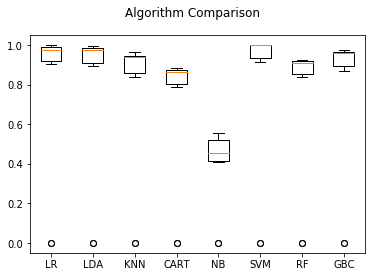

In [18]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

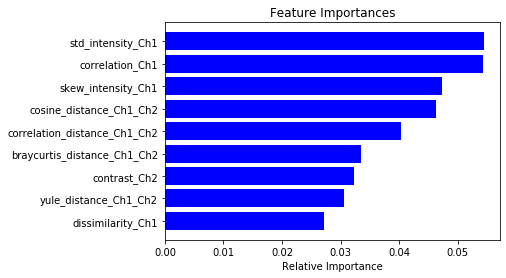

In [19]:

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
# fit the model
model.fit(X, Y)
# get importance
importances = model.feature_importances_
    
indices = np.argsort(importances)[-10:-1]

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [df_features.columns.values[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [20]:
from sklearn.manifold import TSNE

In [21]:
X_embedded = TSNE(n_components=2).fit_transform(X)

In [25]:
import seaborn as sns

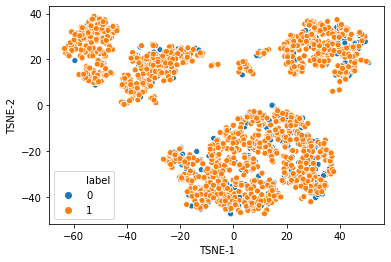

In [28]:
df = pd.DataFrame()
df["TSNE-1"] = X_embedded[:,0]
df["TSNE-2"] = X_embedded[:,1]
df["label"] = Y

sns.scatterplot(data=df, x="TSNE-1", y="TSNE-2", hue = "label")